In [8]:
import globals as gl
import matplotlib.pyplot as plt
# import topologies.RRG as RRG
import topologies.Slimfly as Slimfly
import pickle
import math
import numpy as np
from statistics import mean
import nexullance.LP_gurobi as Nexullance

In [9]:
config=(32, 6)
# config=(98, 11)
topo_name='slimfly'
_network=Slimfly.Slimflytopo(config[0], config[1])
shortest_path_dict = _network.calculate_all_shortest_paths()
APST_4_path_dict = _network.calculate_all_paths_within_length(4)
edge_list=list(_network.nx_graph.edges())

In [10]:
TM=gl.generate_random_cluster_pattern(config[0], config[1])

In [11]:
_x = []
_min_remote_link_load = []
_ave_remote_link_load = []
_max_remote_link_load = []

_min_local_link_load = []
_ave_local_link_load = []
_max_local_link_load = []


Nexullance_min_remote_link_load = []
Nexullance_ave_remote_link_load = []
Nexullance_max_remote_link_load = []

Nexullance_min_local_link_load = []
Nexullance_ave_local_link_load = []
Nexullance_max_local_link_load = []

for subcription in range(config[1]-1, 0, -1):
    _x.append(subcription)
    for i in range(config[0]):
        TM=np.delete(TM, i*subcription, 0)
        TM=np.delete(TM, i*subcription, 1)
        
    link_load, local_link_load = _network.distribute_arbitrary_flow_on_paths_with_EPs(shortest_path_dict, subcription, TM)
    
    _max_remote_link_load.append(max(list(link_load)))
    _ave_remote_link_load.append(mean(list(link_load)))
    _min_remote_link_load.append(min(list(link_load)))

    _max_local_link_load.append(max(list(local_link_load)))
    _ave_local_link_load.append(mean(list(local_link_load)))
    _min_local_link_load.append(min(list(local_link_load)))


    R2R_TM=gl.convert_p2p_traffic_matrix_to_R2R(TM, config[0], subcription)
    all_weighted_paths, _, _ = Nexullance.Solve_load_balancing(APST_4_path_dict, edge_list, R2R_TM)
    link_load, local_link_load = _network.distribute_arbitrary_flow_on_weighted_paths_with_EPs(all_weighted_paths, subcription, TM)
    
    Nexullance_max_remote_link_load.append(max(list(link_load)))
    Nexullance_ave_remote_link_load.append(mean(list(link_load)))
    Nexullance_min_remote_link_load.append(min(list(link_load)))

    Nexullance_max_local_link_load.append(max(list(local_link_load)))
    Nexullance_ave_local_link_load.append(mean(list(local_link_load)))
    Nexullance_min_local_link_load.append(min(list(local_link_load)))


Set parameter Username
Academic license - for non-commercial use only - expires 2024-09-07
Set parameter Threads to value 1
Optimal solution found
Max link load is: 6.687499999999999
Set parameter Username
Academic license - for non-commercial use only - expires 2024-09-07
Set parameter Threads to value 1
Optimal solution found
Max link load is: 4.181814575990753
Set parameter Username
Academic license - for non-commercial use only - expires 2024-09-07
Set parameter Threads to value 1
Optimal solution found
Max link load is: 2.405753040224509
Set parameter Username
Academic license - for non-commercial use only - expires 2024-09-07
Set parameter Threads to value 1
Optimal solution found
Max link load is: 1.2943043102517013
Set parameter Username
Academic license - for non-commercial use only - expires 2024-09-07
Set parameter Threads to value 1
Optimal solution found
Max link load is: 0.4636363636363637


<Figure size 8000x6000 with 0 Axes>

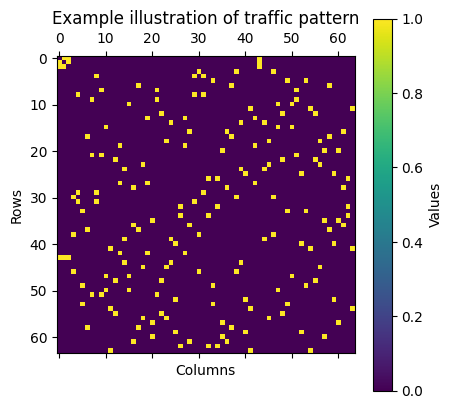

In [12]:
# illustrate traffic pattern:
TM=gl.generate_random_cluster_pattern(16, 4)
plt.figure(figsize=(80, 60))
plt.matshow(TM, cmap='viridis')
plt.colorbar(label='Values')
plt.title('Example illustration of traffic pattern')
plt.xlabel('Columns')
plt.ylabel('Rows')
plt.show()

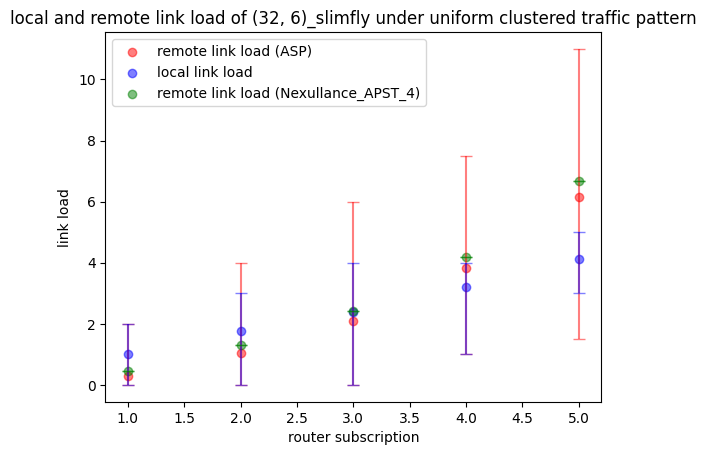

In [13]:
offered_load = 1.0
# Create the scatter plot
plt.scatter(_x, offered_load*np.array(_ave_remote_link_load), 
            color='red', label='remote link load (ASP)', alpha=0.5)
for i in range(len(_x)):
    plt.errorbar(_x[i], offered_load*_ave_remote_link_load[i], 
                yerr=[[offered_load*_ave_remote_link_load[i]-offered_load*_min_remote_link_load[i]], 
                [offered_load*_max_remote_link_load[i]-offered_load*_ave_remote_link_load[i]]], 
                fmt='none', ecolor='red', capsize=4, alpha=0.5)
# Create the scatter plot
plt.scatter(_x, offered_load*np.array(_ave_local_link_load), 
            color='blue', label='local link load', alpha=0.5)
for i in range(len(_x)):
    plt.errorbar(_x[i], offered_load*_ave_local_link_load[i], 
                yerr=[[offered_load*_ave_local_link_load[i]-offered_load*_min_local_link_load[i]], 
                [offered_load*_max_local_link_load[i]-offered_load*_ave_local_link_load[i]]], 
                fmt='none', ecolor='blue', capsize=4, alpha=0.5)


plt.scatter(_x, offered_load*np.array(Nexullance_ave_remote_link_load), 
            color='green', label='remote link load (Nexullance_APST_4)', alpha=0.5)
for i in range(len(_x)):
    plt.errorbar(_x[i], offered_load*Nexullance_ave_remote_link_load[i], 
                yerr=[[offered_load*Nexullance_ave_remote_link_load[i]-offered_load*Nexullance_min_remote_link_load[i]], 
                [offered_load*Nexullance_max_remote_link_load[i]-offered_load*Nexullance_ave_remote_link_load[i]]], 
                fmt='none', ecolor='green', capsize=4, alpha=0.5)
# Create the scatter plot
# plt.scatter(_x, offered_load*np.array(Nexullance_ave_local_link_load), color='blue', label='local link load')
# for i in range(len(_x)):
#     plt.errorbar(_x[i], offered_load*Nexullance_ave_local_link_load[i], yerr=[[offered_load*Nexullance_ave_local_link_load[i]-offered_load*Nexullance_min_local_link_load[i]], 
#                             [offered_load*Nexullance_max_local_link_load[i]-offered_load*Nexullance_ave_local_link_load[i]]], fmt='none', ecolor='blue', capsize=4)


# Add labels and title
plt.xlabel('router subscription')
plt.ylabel('link load')
# plt.ylim([0,2.0])
plt.title(f'local and remote link load of {config}_{topo_name} under uniform clustered traffic pattern') #TODO: change text
plt.legend(loc='upper left')


# Show the plot
plt.show()

In [14]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation
import math
from IPython.core.display import display, HTML

# Create a function to update the plot for each frame
def update_frame(offered_load):
    ax.clear()  # Clear the current figure
    ax.scatter(_x, offered_load * np.array(_ave_remote_link_load), color='red', label='remote link load', alpha=0.5)
    for i in range(len(_x)):
        ax.errorbar(_x[i], offered_load * _ave_remote_link_load[i], yerr=[[offered_load * _ave_remote_link_load[i] - offered_load * _min_remote_link_load[i]],
                                                                    [offered_load * _max_remote_link_load[i] - offered_load * _ave_remote_link_load[i]]],
                     fmt='none', ecolor='red', capsize=4, alpha=0.5)
    
    ax.scatter(_x, offered_load*np.array(_ave_local_link_load), color='blue', label='local link load', alpha=0.5)
    for i in range(len(_x)):
        ax.errorbar(_x[i], offered_load*_ave_local_link_load[i], yerr=[[offered_load*_ave_local_link_load[i]-offered_load*_min_local_link_load[i]], 
                            [offered_load*_max_local_link_load[i]-offered_load*_ave_local_link_load[i]]], 
                    fmt='none', ecolor='blue', capsize=4, alpha=0.5)
    # p_optimal = math.ceil(config[1] / 2)
    # ax.axvline(x=p_optimal, color='g', label='theoretical optimal of load balancing (slimfly2014)', linestyle='dashed')
    ax.axhline(y=100, color='blue', label='local link capacity = remote link capacity', linestyle='solid')
    # ax.axhline(y=offered_load, color='b', label='offered load', linestyle='dashed')
    # ax.set_ylim([0, 2.0])
    ax.legend(loc='upper left')
    
    ax.set_xlabel('router subscription (EPR)')
    ax.set_ylabel('link load')
    ax.set_ylim([0, 300])
    ax.set_title(f'local and remote link load of {config}_{topo_name} under uniform clustered traffic pattern') #TODO: change text


# Initialize the plot
fig, ax = plt.subplots()


max_offered_load=100/_ave_local_link_load[len(_ave_local_link_load)//2]
ani = animation.FuncAnimation(fig, update_frame, frames=np.arange(0, max_offered_load, max_offered_load/10))

plt.close()
HTML(ani.to_jshtml())

/tmp/ipykernel_15254/2533973049.py:5: DeprecationWarning: Importing display from IPython.core.display is deprecated since IPython 7.14, please import from IPython display
  from IPython.core.display import display, HTML
